# Python Cleaning Data
A vital component of data science involves acquiring raw data and getting it into a form ready for analysis. In fact, it is commonly said that data scientists spend 80% of their time cleaning and manipulating data, and only 20% of their time actually analyzing it. This notebook gathers notes you can use to clean your data in Python, from learning how to diagnose your data for problems to dealing with missing values and outliers.

## Diagnose Data for Cleaning

### Loading and viewing your data (visual inspection)
In this chapter, you're going to look at a subset of the Department of Buildings Job Application Filings dataset from the NYC Open Data portal. This dataset consists of job applications filed on January 22, 2017.

Your first task is to load this dataset into a DataFrame and then inspect it using the `.head()` and `.tail()` methods. However, you'll find out very quickly that the printed results don't allow you to see everything you need, since there are too many columns. Therefore, you need to look at the data in another way.

The `.shape` and `.columns` attributes let you see the shape of the DataFrame and obtain a list of its columns. From here, you can see which columns are relevant to the questions you'd like to ask of the data. To this end, a new DataFrame, `df_subset`, consisting only of these relevant columns, has been pre-loaded. This is the DataFrame you'll work with in the rest of the chapter.

Get acquainted with the dataset now by exploring it with pandas! This **initial exploratory analysis is a crucial first step of data cleaning**.

In [19]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('data/dob_job_application_filings.csv')

df_subset = pd.read_csv('data/dob_job_application_filings_subset.csv')

In [20]:
# Print the head of df
df.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
0,121577873,2,MANHATTAN,386,PARK AVENUE SOUTH,857,38,1016890,A2,D,...,MIGLIORE,MACKLOWE MANAGEMENT,126,EAST 56TH STREET,NEW YORK,NY,10222,2125545837,GENERAL MECHANICAL & PLUMBING MODIFICATIONS AS...,04/26/2013 12:00:00 AM
1,520129502,1,STATEN ISLAND,107,KNOX PLACE,342,1,5161350,A3,A,...,BLUMENBERG,NA,107,KNOX PLACE,STATEN ISLAND,NY,10314,3477398892,BUILDERS PAVEMENT PLAN 143 LF. ...,04/26/2013 12:00:00 AM
2,121601560,1,MANHATTAN,63,WEST 131 STREET,1729,9,1053831,A2,Q,...,MARKOWITZ,635 RIVERSIDE DRIVE NY LLC,619,WEST 54TH STREET,NEW YORK,NY,10016,2127652555,GENERAL CONSTRUCTION TO INCLUDE NEW PARTITIONS...,04/26/2013 12:00:00 AM
3,121601203,1,MANHATTAN,48,WEST 25TH STREET,826,69,1015610,A2,D,...,CASALE,48 W 25 ST LLC C/O BERNSTEIN,150,WEST 30TH STREET,NEW YORK,NY,10001,2125941414,STRUCTURAL CHANGES ON THE 5TH FLOOR (MOONDOG E...,04/26/2013 12:00:00 AM
4,121601338,1,MANHATTAN,45,WEST 29 STREET,831,7,1015754,A3,D,...,LEE,HYUNG-HYANG REALTY CORP,614,8 AVENUE,NEW YORK,NY,10001,2019881222,FILING HEREWITH FACADE REPAIR PLANS. WORK SCOP...,04/26/2013 12:00:00 AM


In [21]:
# Print the tail of df
df.tail()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
12841,520143988,1,STATEN ISLAND,8,NOEL STREET,5382,20,5069722,A2,D,...,MALITO,GENO MALITO,8,NOEL STREET,STATEN ISLAND,NY,10312,9174685659,HORIZONTAL ENLARGEMENT OF ATTACHED ONE CAR GAR...,06/13/2013 12:00:00 AM
12842,121613833,1,MANHATTAN,724,10 AVENUE,1059,4,1082503,A2,D,...,CROMAN,722-724 10TH AVENUE HOLDING LLC,632,BROADWAY,NEW YORK,NY,10012,2122289300,RENOVATION OF EXISTING APARTMENT #3B ON THIRD ...,06/13/2013 12:00:00 AM
12843,121681260,1,MANHATTAN,350,MANHATTAN AVE.,1848,31,1055849,A2,A,...,ARYEH,DG UWS LLC,619,WEST 54TH STREET,NEW YORK,NY,10019,2127652555,REPLACE BURNER IN EXSTG BOILER WITH NEW GAS BU...,06/13/2013 12:00:00 AM
12844,320771704,1,BROOKLYN,499,UNION STREET,431,43,3007185,A2,D,...,WIGGINS,N/A,77,PROSPECT PLACE,BROOKLYN,NY,11217,9178487799,INSTALL NEW SPRINKLER SYSTEM THROUGHOUT THE BU...,06/13/2013 12:00:00 AM
12845,520143951,1,STATEN ISLAND,1755,RICHMOND ROAD,887,28,5022931,A2,D,...,CAMBRIA,RONALD CAMBRIA,1755,RICHMOND ROAD,STATEN ISLAND,NY,10304,7184482740,INTERIOR PARTITIONS AND MINOR PLUMBING WORK TO...,06/13/2013 12:00:00 AM


In [22]:
# Print the shape of df
df.shape

(12846, 82)

In [23]:
# Print the columns of df
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

In addition to the suspicious number of 0 values, which may represent missing data, notice that the columns that contain monetary values - 'Initial Cost' and 'Total Est. Fee' - have a dollar sign in the beginning. These columns may be coded as strings instead of numeric values. You will check this in the next exercise.

### Further diagnosis
In the previous exercise, you identified some potentially unclean or missing data. Now, you'll continue to diagnose your data with the very useful `.info()` method.

The `.info()` method provides important information about a DataFrame, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column. This is the kind of information that will allow you to confirm whether the 'Initial Cost' and 'Total Est. Fee' columns are numeric or strings. From the results, you'll also be able to see whether or not all columns have complete data in them.

Your task is to use the `.info()` method and analyze the results.

In [24]:
# Print the info of df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

In [25]:
df.shape

(12846, 82)

In [26]:
# Print the info of subset df used later to narrow the cleaning scope
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 14 columns):
Unnamed: 0                 12846 non-null int64
Job #                      12846 non-null int64
Doc #                      12846 non-null int64
Borough                    12846 non-null object
Initial Cost               12846 non-null object
Total Est. Fee             12846 non-null object
Existing Zoning Sqft       12846 non-null int64
Proposed Zoning Sqft       12846 non-null int64
Enlargement SQ Footage     12846 non-null int64
Street Frontage            12846 non-null int64
ExistingNo. of Stories     12846 non-null int64
Proposed No. of Stories    12846 non-null int64
Existing Height            12846 non-null int64
Proposed Height            12846 non-null int64
dtypes: int64(11), object(3)
memory usage: 1.4+ MB
None


Notice that the columns 'Initial Cost' and 'Total Est. Fee' are of type object. The currency sign in the beginning of each value in these columns needs to be removed, and the columns need to be converted to numeric. In the full DataFrame, note that there are a lot of missing values. You saw in the previous exercise that there are also a lot of 0 values. Given the amount of data that is missing in the full dataset, it's highly likely that these 0 values represent missing data.

## Exploratory Data Analysis (EDA)

### Frequency Count (count the number of unique values including missing values in categorical data)
`.describe()` can only be used on numeric columns. So how can you diagnose data issues when you have categorical data? One way is by using the `.value_counts()` method, which returns the frequency counts for each unique value in a column!

This method also has an optional parameter called `dropna` which is True by default. What this means is if you have missing data in a column, it will not give a frequency count of them. You want to set the `dropna` parameter to False so if there are missing values in a column, it will give you the frequency counts.

In this exercise, you're going to look at the `'Borough'`, `'State'`, and `'Site Fill'` columns to make sure all the values in there are valid. When looking at the output, do a sanity check: Are all values in the `'State'` column from NY, for example? Since the dataset consists of applications filed in NY, you would expect this to be the case.

In [27]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64
NY    12391
NJ      241
PA       38
CA       20
OH       19
IL       17
FL       17
CT       16
TX       13
TN       10
DC        7
MD        7
KS        6
GA        6
MA        6
VA        5
CO        4
AZ        3
WI        3
MN        3
SC        3
NC        2
UT        2
RI        2
VT        1
IN        1
WA        1
NM        1
MI        1
Name: State, dtype: int64
NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


Notice how not all values in the 'State' column are NY. This is an interesting find, as this data is supposed to consist of applications filed in NYC. Curiously, all the 'Borough' values are correct. A good start as to why this may be the case would be to find and look at the codebook for this dataset. Also, for the 'Site Fill' column, you may or may not need to recode the NOT APPLICABLE values to NaN in your final analysis.

### Summary Statistics (outliers in numeric columns)

You'll now use the `.describe()` method to calculate summary statistics of your data.

In [28]:
df_subset.describe()

,Unnamed: 0,Job #,Doc #,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
count,12846.000000,1.284600e+04,12846.000000,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000
mean,6422.500000,2.426788e+08,1.162930,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562
std,3708.465114,1.312507e+08,0.514937,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666
min,0.000000,1.036438e+08,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3211.250000,1.216206e+08,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000
50%,6422.500000,2.202645e+08,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000
75%,9633.750000,3.208652e+08,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000
max,12845.000000,5.400246e+08,9.000000,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000


### Data Visualization (to spot outliers and obvious errors)
- Use **bar plots** to plot discrete data
- Use **histograms** to plot continuous data
- Use **box plots** to visualize basic summary statistics
- Use **scatter plots** to see the relationship between 2 numeric variables

#### Visualizing single variables with histograms

Up until now, you've been looking at **descriptive statistics** of your data. One of the best ways to confirm what the numbers are telling you is to plot and visualize the data.

You'll start by visualizing single variables using a histogram for numeric values. The column you will work on in this exercise is `'Existing Zoning Sqft'`.

The `.plot()` method allows you to create a plot of each column of a DataFrame. The kind parameter allows you to specify the type of plot to use - `kind='hist'`, for example, plots a histogram.

In the IPython Shell, begin by computing summary statistics for the `'Existing Zoning Sqft'` column using the `.describe()` method. You'll notice that there are extremely large differences between the `min` and `max` values, and the plot will need to be adjusted accordingly. In such cases, it's good to look at the plot on a **log scale**. The keyword arguments `logx=True` or `logy=True` can be passed in to `.plot()` depending on which axis you want to rescale.

Finally, note that Python will render a plot such that the axis will hold all the information. That is, if you end up with large amounts of whitespace in your plot, it indicates counts or values too small to render.

count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64


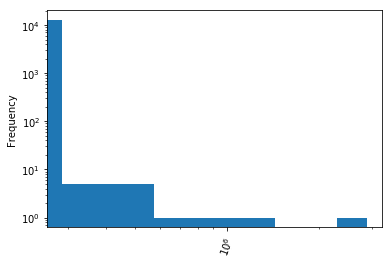

In [33]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# Describe the column
print(df['Existing Zoning Sqft'].describe())

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show();

While visualizing your data is a great way to understand it, keep in mind that no one technique is better than another. As you saw here, you still needed to look at the summary statistics to help understand your data better. You expected a large amount of counts on the left side of the plot because the 25th, 50th, and 75th percentiles have a value of 0. The plot shows us that there are barely any counts near the max value, signifying an outlier.

#### Visualizing multiple variables with boxplots
**Histograms** are great ways of visualizing single variables. To visualize multiple variables, **boxplots** are useful, especially when one of the variables is categorical.

In this exercise, your job is to use a **boxplot** to compare the `'initial_cost'` across the different values of the `'Borough'` column. The pandas `.boxplot()` method is a quick way to do this, in which you have to specify the column and by parameters. Here, you want to visualize how `'initial_cost'` varies by `'Borough'`.

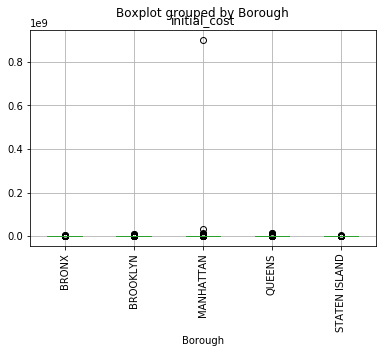

In [41]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Read another version of the dataset for demonstration
df2 = pd.read_csv('data/dob_job_application_filings2.csv')

# Create the boxplot
df2.boxplot(column='initial_cost', by='Borough', rot=90)

# Display the plot
plt.show();

You can see the 2 extreme outliers are in the borough of Manhattan. An initial guess could be that since land in Manhattan is extremely expensive, these outliers may be valid data points. Again, further investigation is needed to determine whether or not you can drop or keep those points in your data.

#### Visualizing multiple variables with scatter plots
**Boxplots** are great when you have a numeric column that you want to compare across different categories. When you want to visualize two numeric columns, **scatter plots** are ideal.

In this exercise, your job is to make a scatter plot with `'initial_cost'` on the x-axis and the `'total_est_fee'` on the y-axis. You can do this by using the DataFrame `.plot()` method with `kind='scatter'`. You'll notice right away that there are 2 major outliers shown in the plots.

Since these outliers dominate the plot, an additional DataFrame, `df_subset`, has been provided, in which some of the extreme values have been removed. After making a scatter plot using this, you'll find some interesting patterns here that would not have been seen by looking at summary statistics or 1 variable plots.

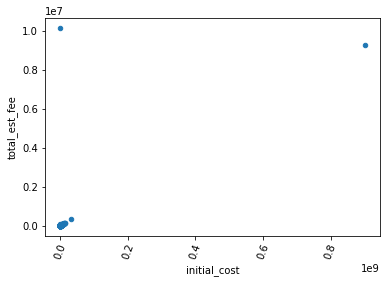

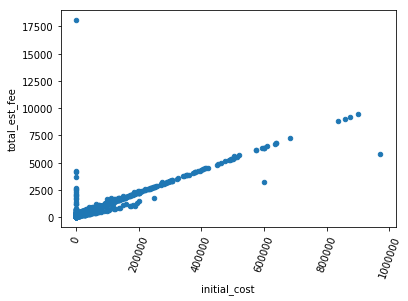

In [44]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create and display the first scatter plot
# Rotate the x-axis labels by 70 degrees
df2.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show();

# Read another version of the dataset for demonstration
df2_subset = pd.read_csv('data/dob_job_application_filings_subset2.csv')

# Create and display the second scatter plot
df2_subset.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show();

In general, from the second plot it seems like there is a strong correlation between 'initial_cost' and 'total_est_fee'. In addition, take note of the large number of points that have an 'initial_cost' of 0. It is difficult to infer any trends from the first plot because it is dominated by the outliers.

## Tidying Data for Analysis
There is Tidy Data format defined by Hadley Wickham. The dataset prepared for reporting usually is not good for analysis for which it should be in the [Tidy](https://en.wikipedia.org/wiki/Tidy_data) format.

[Tidy Data by Hadley Wickham](https://www.researchgate.net/publication/215990669_Tidy_data) - It’s often said that 80% of the effort of analysis is in data cleaning. Despite the amount of time it takes, there has been little research on how to clean data well. This paper attempts to tackle a small, but important, subset of data cleaning: data “tidying”. “Tidy” data is easy to manipulate, model and visualise, and has a specific structure: variables are stored in columns, observations in rows, and one type of experimental unit per file. This structure makes it easy to tidy messy data, because only a small set of tools are needed to deal with a large number of messy data sets. Tidy data is only useful in conjunction with tidy tools, tools that input and output tidy data. Tidy tools for manipulation, modelling, and visualisation are described, and the notion of tidy tools is used to critique existing messy tools.

### Recognizing tidy data
For data to be tidy, it must have:
- Each variable as a separate column.
- Each row as a separate observation.

As a data scientist, you'll encounter data that is represented in a variety of different ways, so it is important to be able to recognize tidy (or untidy) data when you see it.

In this exercise, two example datasets have been pre-loaded into the DataFrames df1 and df2. Only one of them is tidy. Your job is to explore these further in the IPython Shell and identify the one that is not tidy, and why it is not tidy.

In [ ]:
In [1]: df1.head()
Out[1]: 
   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5

In [2]: df2.head()
Out[2]: 
   Month  Day variable  value
0      5    1    Ozone   41.0
1      5    2    Ozone   36.0
2      5    3    Ozone   12.0
3      5    4    Ozone   18.0
4      5    5    Ozone    NaN

df2; each variable is not a separate column

Exactly! Notice that the variable column of df2 contains the values Solar.R, Ozone, Temp, and Wind. For it to be tidy, these should all be in separate columns, as in df1.

### Data Melting

**Melting data** is the process of turning columns of your data into rows of data. Consider the DataFrames from the previous exercise. In the tidy DataFrame, the variables Ozone, Solar.R, Wind, and Temp each had their own column. If, however, you wanted these variables to be in rows instead, you could melt the DataFrame. In doing so, however, you would make the data untidy! This is important to keep in mind: Depending on how your data is represented, you will have to reshape it differently (e.g., this could make it easier to plot values).

In this exercise, you will practice melting a DataFrame using `pd.melt()`. There are two parameters you should be aware of: `id_vars` and `value_vars`. The `id_vars` represents the columns of the data you do not want to melt (i.e., keep it in its current shape), while the `value_vars` represent the columns you do wish to melt into rows. By default, if no `value_vars` are provided, all columns not set in the `id_vars` will be melted. This could save a bit of typing, depending on the number of columns that need to be melted. 

Use `pd.melt()` to melt the Ozone, Solar.R, Wind, and Temp columns of airquality into rows. Do this by using `id_vars` to specify the columns you do not wish to melt: 'Month' and 'Day'.

The (tidy) DataFrame airquality has been pre-loaded. Your job is to melt its Ozone, Solar.R, Wind, and Temp columns into rows. Later, you'll learn how to bring this melted DataFrame back into a tidy form (using **pivoting**).

In [49]:
airquality = pd.read_csv('data/airquality.csv')

# Print the head of airquality
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'], value_vars=['Ozone', 'Solar.R', 'Wind', 'Temp'])

# Print the head of airquality_melt
print(airquality_melt.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
   Month  Day variable  value
0      5    1    Ozone   41.0
1      5    2    Ozone   36.0
2      5    3    Ozone   12.0
3      5    4    Ozone   18.0
4      5    5    Ozone    NaN


This exercise demonstrates that melting a DataFrame is not always appropriate if you want to make it tidy. You may have to perform other transformations depending on how your data is represented.

When melting DataFrames, it would be better to have column names more meaningful than `variable` and `value` (the default names used by `pd.melt())`.

The default names may work in certain situations, but it's best to always have data that is self explanatory.

You can rename the `variable` column by specifying an argument to the `var_name` parameter, and the `value` column by specifying an argument to the `value_name` parameter. 

In [51]:
# Print the head of airquality
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'], var_name='Measurement', value_name='Reading')

# Print the head of airquality_melt
print(airquality_melt.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
   Month  Day Measurement  Reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


The DataFrame is more informative now. Next, you'll learn about **pivoting**, which is the opposite of **melting**. You'll then be able to convert this DataFrame back into its original, tidy, form!

### Data Pivoting

**Pivoting** data is the opposite of **melting** it. Remember the tidy form that the airquality DataFrame was in before you melted it? You'll now begin pivoting it back into that form using the `.pivot_table()` method!

While **melting** takes a set of columns and turns it into a single column, **pivoting** will create a new column for each unique value in a specified column.

`.pivot_table()` has an `index` parameter which you can use to specify the columns that you don't want pivoted: It is similar to the `id_vars` parameter of `pd.melt()`. Two other parameters that you have to specify are `columns` (the name of the column you want to pivot), and `values` (the values to be used when the column is pivoted). 

In [53]:
# Print the head of airquality_melt
print(airquality_melt.head())

# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='Measurement', values='Reading')

# Print the head of airquality_pivot
print(airquality_pivot.head())

   Month  Day Measurement  Reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN
Measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


Notice that the pivoted DataFrame does not actually look like the original DataFrame. In the next exercise, you'll turn this pivoted DataFrame back into its original form.

### Resetting the index of a DataFrame
After pivoting `airquality_melt` in the previous exercise, you didn't quite get back the original DataFrame.

What you got back instead was a pandas DataFrame with a **hierarchical index** (also known as a **MultiIndex**).

**Hierarchical indexes** are covered in depth in Manipulating DataFrames with pandas. In essence, they allow you to group columns or rows by another variable - in this case, by 'Month' as well as 'Day'.

There's a very simple method you can use to get back the original DataFrame from the pivoted DataFrame: `.reset_index()`.

In [55]:
# Print the index of airquality_pivot
print(airquality_pivot.index)

# Reset the index of airquality_pivot: airquality_pivot_reset
airquality_pivot_reset = airquality_pivot.reset_index()

# Print the new index of airquality_pivot_reset
print(airquality_pivot_reset.index)

# Print the head of airquality_pivot_reset
print(airquality_pivot_reset.head())

MultiIndex(levels=[[5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 

You've now converted the DataFrame back into its original form!

### Pivoting duplicate values

So far, you've used the `.pivot_table()` method when there are multiple index values you want to hold constant during a pivot. You can also use pivot tables to deal with duplicate values by providing an aggregation function through the `aggfunc` parameter. Here, you're going to combine both these uses of pivot tables.

Let's say your data collection method accidentally duplicated your dataset. Such a dataset, in which each row is duplicated, has been pre-loaded as `airquality_dup`. In addition, the `airquality_melt` DataFrame from the previous exercise has been pre-loaded. Explore their shapes in the IPython Shell by accessing their `.shape` attributes to confirm the duplicate rows present in `airquality_dup`.

You'll see that by using `.pivot_table()` and the `aggfunc` parameter, **you can not only reshape your data, but also remove duplicates**. Finally, you can then flatten the columns of the pivoted DataFrame using `.reset_index()`.

In [61]:
import numpy as np

airquality_dup = pd.read_csv('data/airquality_dup.csv')
print(airquality_dup.head())

# Pivot table the airquality_dup: airquality_pivot
airquality_pivot = airquality_dup.pivot_table(index=['Month', 'Day'], 
                                              columns='measurement', 
                                              values='reading', 
                                              aggfunc=np.mean)

# Print the head of airquality_pivot before reset_index
print(airquality_pivot.head())

# Reset the index of airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

# Print the head of airquality_pivot
print(airquality_pivot.head())

# Print the head of airquality
print(airquality.head())

print(airquality_dup.shape)
print(airquality_pivot.shape)

   Unnamed: 0  Month  Day measurement  reading
0           0      5    1       Ozone     41.0
1           1      5    2       Ozone     36.0
2           2      5    3       Ozone     12.0
3           3      5    4       Ozone     18.0
4           4      5    5       Ozone      NaN
measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3
measurement  Month  Day  Ozone  Solar.R  Temp  Wind
0                5    1   41.0    190.0  67.0   7.4
1                5    2   36.0    118.0  72.0   8.0
2                5    3   12.0    149.0  74.0  12.6
3                5    4   18.0    313.0  62.0  11.5
4                5    5    NaN      NaN  56.0  14.3
   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2


The default aggregation function used by `.pivot_table()` is `np.mean()`. So you could have pivoted the duplicate values in this DataFrame even without explicitly specifying the `aggfunc` parameter.

### Splitting a column with .str

The dataset, consisting of case counts of tuberculosis by country, year, gender, and age group, has been pre-loaded into a DataFrame as `tb`.

In this exercise, you're going to tidy the `'m014'` column, which represents `males aged 0-14 years of age`. In order to parse this value, you need to extract the first letter into a new column for gender, and the rest into a column for `age_group`. Here, since you can parse values by position, you can take advantage of pandas' vectorized string slicing by using the `str` attribute of columns of type object.

Begin by printing the columns of `tb` in the IPython Shell using its `.columns` attribute, and take note of the problematic column.

In [62]:
tb = pd.read_csv('data/tb.csv')
print(tb.head())

# Melt tb: tb_melt
tb_melt = pd.melt(tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())

  country  year  m014  m1524  m2534  m3544  m4554  m5564   m65  mu  f014  \
0      AD  2000   0.0    0.0    1.0    0.0    0.0    0.0   0.0 NaN   NaN   
1      AE  2000   2.0    4.0    4.0    6.0    5.0   12.0  10.0 NaN   3.0   
2      AF  2000  52.0  228.0  183.0  149.0  129.0   94.0  80.0 NaN  93.0   
3      AG  2000   0.0    0.0    0.0    0.0    0.0    0.0   1.0 NaN   1.0   
4      AL  2000   2.0   19.0   21.0   14.0   24.0   19.0  16.0 NaN   3.0   

   f1524  f2534  f3544  f4554  f5564   f65  fu  
0    NaN    NaN    NaN    NaN    NaN   NaN NaN  
1   16.0    1.0    3.0    0.0    0.0   4.0 NaN  
2  414.0  565.0  339.0  205.0   99.0  36.0 NaN  
3    1.0    1.0    0.0    0.0    0.0   0.0 NaN  
4   11.0   10.0    8.0    8.0    5.0  11.0 NaN  
  country  year variable  value gender age_group
0      AD  2000     m014    0.0      m       014
1      AE  2000     m014    2.0      m       014
2      AF  2000     m014   52.0      m       014
3      AG  2000     m014    0.0      m       014
4   

Notice the new `'gender'` and `'age_group'` columns you created. It is vital to be able to split columns as needed so you can access the data that is relevant to your question.

### Splitting a column with .split() and .get()

Another common way multiple variables are stored in columns is with a **delimiter**. You'll learn how to deal with such cases in this exercise, using a dataset consisting of [Ebola cases and death counts by state and country](https://data.humdata.org/dataset/ebola-cases-2014). It has been pre-loaded into a DataFrame as `ebola`.

Print the columns of `ebola` in the IPython Shell using `ebola.columns`. Notice that the data has column names such as `Cases_Guinea` and `Deaths_Guinea`. Here, the underscore `_` serves as a delimiter between the first part (cases or deaths), and the second part (country).

This time, you cannot directly slice the variable by position as in the previous exercise. You now need to use Python's built-in string method called `.split()`. By default, this method will split a string into parts separated by a space. However, in this case you want it to split by an underscore. You can do this on 'Cases_Guinea', for example, using `'Cases_Guinea'.split('_')`, which returns the list `['Cases', 'Guinea']`.

The next challenge is to extract the first element of this list and assign it to a type variable, and the second element of the list to a country variable. You can accomplish this by accessing the str attribute of the column and using the `.get()` method to retrieve the 0 or 1 index, depending on the part you want.

In [78]:
ebola = pd.read_csv('data/ebola.csv')
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [80]:
# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

ebola_melt.head()

,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [81]:
# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')

ebola_melt.head()

,Date,Day,type_country,counts,str_split
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]"
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]"
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]"
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]"
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]"


In [82]:
# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

ebola_melt.head()

,Date,Day,type_country,counts,str_split,type
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]",Cases
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]",Cases
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]",Cases


In [83]:
# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

# Print the head of ebola_melt
ebola_melt.head()

,Date,Day,type_country,counts,str_split,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]",Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]",Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]",Cases,Guinea


## Combining data for analysis

### Concatenating Data

#### Combining rows of data
The original dataset has all the originating Uber pickup locations by time and latitude and longitude. For didactic purposes, you'll be working with a very small portion of the actual data.

Three DataFrames have been pre-loaded: `uber1`, which contains data for April 2014, `uber2`, which contains data for May 2014, and `uber3`, which contains data for June 2014. Your job in this exercise is to concatenate these DataFrames together such that the resulting DataFrame has the data for all three months.

In [92]:
uber1 = pd.read_csv('data/uber1.csv')
print(uber1.shape)
uber1.head()

(99, 5)


,Unnamed: 0,Date/Time,Lat,Lon,Base
0,0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [93]:
uber2 = pd.read_csv('data/uber2.csv')
print(uber2.shape)
uber2.head()

(99, 5)


,Unnamed: 0,Date/Time,Lat,Lon,Base
0,0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,4,5/1/2014 0:17:00,40.7594,-73.9734,B02512


In [96]:
uber3 = pd.read_csv('data/uber3.csv')
print(uber3.shape)
uber3.tail()

(99, 5)


,Unnamed: 0,Date/Time,Lat,Lon,Base
94,94,6/1/2014 6:27:00,40.7554,-73.9738,B02512
95,95,6/1/2014 6:35:00,40.7543,-73.9817,B02512
96,96,6/1/2014 6:37:00,40.7751,-73.9633,B02512
97,97,6/1/2014 6:46:00,40.6952,-74.1784,B02512
98,98,6/1/2014 6:51:00,40.7621,-73.9817,B02512


In [97]:
# Concatenate uber1, uber2, and uber3: row_concat
row_concat = pd.concat([uber1, uber2, uber3])

# Print the shape of row_concat
print(row_concat.shape)

# Print the head of row_concat
print(row_concat.head())

# Print the head of row_concat
print(row_concat.tail())

(297, 5)
   Unnamed: 0         Date/Time      Lat      Lon    Base
0           0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1           1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2           2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3           3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4           4  4/1/2014 0:33:00  40.7594 -73.9722  B02512
    Unnamed: 0         Date/Time      Lat      Lon    Base
94          94  6/1/2014 6:27:00  40.7554 -73.9738  B02512
95          95  6/1/2014 6:35:00  40.7543 -73.9817  B02512
96          96  6/1/2014 6:37:00  40.7751 -73.9633  B02512
97          97  6/1/2014 6:46:00  40.6952 -74.1784  B02512
98          98  6/1/2014 6:51:00  40.7621 -73.9817  B02512


You have successfully concatenated the three uber DataFrames! Notice that the head of `row_concat` is the same as the head of `uber1`, while the tail of row_concat is the same as the tail of `uber3`.

#### Combining columns of data
Think of column-wise concatenation of data as stitching data together from the sides instead of the top and bottom. To perform this action, you use the same `pd.concat()` function, but this time with the keyword argument `axis=1`. The default, `axis=0`, is for a row-wise concatenation.

You'll return to the [Ebola dataset](https://data.humdata.org/dataset/ebola-cases-2014) you worked with briefly before. It has been pre-loaded into a DataFrame called `ebola_melt`. In this DataFrame, the status and country of a patient is contained in a single column. This column has been parsed into a new DataFrame, `status_country`, where there are separate columns for status and country.

Explore the `ebola_melt` and `status_country` DataFrames in the IPython Shell. Your job is to concatenate them column-wise in order to obtain a final, clean DataFrame.

In [108]:
ebola_melt = pd.read_csv('data/ebola_melt.csv')
ebola_melt = ebola_melt.drop(['Unnamed: 0'], axis=1)
print(ebola_melt.shape)
ebola_melt.head()

(1952, 4)


,Date,Day,status_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [109]:
status_country = pd.read_csv('data/status_country.csv')
status_country = status_country.drop(['Unnamed: 0'], axis=1)
print(status_country.shape)
status_country.head()

(1952, 2)


,status,country
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea


In [110]:
# Concatenate ebola_melt and status_country column-wise: ebola_tidy
ebola_tidy = pd.concat([ebola_melt, status_country], axis=1)

# Print the shape of ebola_tidy
print(ebola_tidy.shape)

# Print the head of ebola_tidy
ebola_tidy.head()

(1952, 6)


,Date,Day,status_country,counts,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


The concatenated DataFrame has 6 columns, as it should. Notice how the status and country columns have been concatenated column-wise.

### Finding files that match a pattern

You're now going to practice using the `glob` module to find all csv files in the workspace. In the next exercise, you'll programmatically load them into DataFrames.

The `glob` module has a function called `glob` that takes a pattern and returns a list of the files in the working directory that match that pattern.

For example, if you know the pattern is part_ single digit number .csv, you can write the pattern as `'part_?.csv'` (which would match part_1.csv, part_2.csv, part_3.csv, etc.)

Similarly, you can find all .csv files with `'*.csv'`, or all parts with `'part_*'`. The `?` wildcard represents any 1 character, and the `*` wildcard represents any number of characters.

In [115]:
# Import necessary modules
import pandas as pd
import glob

# Write the pattern: pattern
pattern = 'data/uber*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
print(csv_files)

# Load the second file into a DataFrame: csv2
csv2 = pd.read_csv(csv_files[1])

# Print the head of csv2
print(csv2.head())

['data/uber3.csv', 'data/uber2.csv', 'data/uber1.csv']
   Unnamed: 0         Date/Time      Lat      Lon    Base
0           0  5/1/2014 0:02:00  40.7521 -73.9914  B02512
1           1  5/1/2014 0:06:00  40.6965 -73.9715  B02512
2           2  5/1/2014 0:15:00  40.7464 -73.9838  B02512
3           3  5/1/2014 0:17:00  40.7463 -74.0011  B02512
4           4  5/1/2014 0:17:00  40.7594 -73.9734  B02512


The next step is to iterate through this list of filenames, load it into a DataFrame, and add it to a list of DataFrames you can then concatenate together.

### Iterating and concatenating all matches

Now that you have a list of filenames to load, you can load all the files into a list of DataFrames that can then be concatenated.

You'll start with an empty list called `frames`. Your job is to use a for loop to:

- iterate through each of the filenames
- read each filename into a DataFrame, and then
- append it to the frames list.

You can then concatenate this list of DataFrames using `pd.concat()`.

In [116]:
# Create an empty list: frames
frames = []

#  Iterate over csv_files
for csv in csv_files:

    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)
    df = df.drop(['Unnamed: 0'], axis=1)
    
    # Append df to frames
    frames.append(df)

# Concatenate frames into a single DataFrame: uber
uber = pd.concat(frames)

# Print the shape of uber
print(uber.shape)

# Print the head of uber
print(uber.head())

(297, 4)
          Date/Time      Lat      Lon    Base
0  6/1/2014 0:00:00  40.7293 -73.9920  B02512
1  6/1/2014 0:01:00  40.7131 -74.0097  B02512
2  6/1/2014 0:04:00  40.3461 -74.6610  B02512
3  6/1/2014 0:04:00  40.7555 -73.9833  B02512
4  6/1/2014 0:07:00  40.6880 -74.1831  B02512


### Merging Data

Similarily to joining tables in SQL, we merge dataframes by a common set of columns (key).

#### 1-to-1 data merge
Merging data allows you to combine disparate datasets into a single dataset to do more complex analysis.

Two DataFrames have been pre-loaded: `site` and `visited`. Explore them in the IPython Shell and take note of their structure and column names. Your task is to perform a 1-to-1 merge of these two DataFrames using the `'name'` column of site and the `'site'` column of visited.

In [117]:
site = pd.read_csv('data/site.csv')
site = site.drop(['Unnamed: 0'], axis=1)
print(site.shape)
site.head()

(3, 3)


,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [118]:
visited = pd.read_csv('data/visited.csv')
visited = visited.drop(['Unnamed: 0'], axis=1)
print(visited.shape)
visited.head()

(3, 3)


,ident,site,dated
0,619,DR-1,1927-02-08
1,734,DR-3,1939-01-07
2,837,MSK-4,1932-01-14


In [122]:
# Merge the DataFrames: o2o
o2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Print o2o
o2o

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


Notice the 1-to-1 correspondence between the name column of the site DataFrame and the site column of the visited DataFrame. This is what made the 1-to-1 merge possible.

#### Many-to-1 data merge

In a many-to-one (or one-to-many) merge, one of the values will be duplicated and recycled in the output. That is, one of the keys in the merge is not unique.

Here, the two DataFrames `site` and `visited` have been pre-loaded once again. Note that this time, `visited2` has multiple entries for the `site` column. Confirm this by exploring it in the IPython Shell.

The `.merge()` method call is the same as the 1-to-1 merge from the previous exercise, but the data and output will be different.

In [120]:
site = pd.read_csv('data/site.csv')
site = site.drop(['Unnamed: 0'], axis=1)
print(site.shape)
site.head()

(3, 3)


,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [121]:
visited2 = pd.read_csv('data/visited2.csv')
visited2 = visited2.drop(['Unnamed: 0'], axis=1)
print(visited2.shape)
visited2.head()

(8, 3)


,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26


In [124]:
# Merge the DataFrames: m2o
m2o = pd.merge(left=site, right=visited2, left_on='name', right_on='site')

# Print m2o
m2o

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,NaN
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


Notice how the site data is duplicated during this many-to-1 merge!

#### Many-to-many data merge
The final merging scenario occurs when both DataFrames do not have unique keys for a merge. What happens here is that for each duplicated key, every pairwise combination will be created.

Two example DataFrames that share common key values have been pre-loaded: `df1` and `df2`. Another DataFrame `df3`, which is the result of df1 merged with df2, has been pre-loaded. All three DataFrames have been printed - look at the output and notice how pairwise combinations have been created. This example is to help you develop your intuition for many-to-many merges.

In [ ]:
  c1  c2
0  a   1
1  a   2
2  b   3
3  b   4

  c1  c2
0  a  10
1  a  20
2  b  30
3  b  40

  c1  c2_x  c2_y
0  a     1    10
1  a     1    20
2  a     2    10
3  a     2    20
4  b     3    30
5  b     3    40
6  b     4    30
7  b     4    40

Here, you'll work with the `site` and `visited` DataFrames from before, and a new `survey` DataFrame. Your task is to merge `site` and `visited` as you did in the earlier exercises. You will then merge this merged DataFrame with `survey`.

In [133]:
survey = pd.read_csv('data/survey.csv')
survey = survey.drop(['Unnamed: 0'], axis=1)
print(survey.shape)
survey.head()

(21, 4)


,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41


In [134]:
# Merge site and visited: m2m
m2m = pd.merge(left=site, right=visited, left_on='name', right_on='site')

m2m

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [135]:
# Merge m2m and survey: m2m
m2m = pd.merge(left=m2m, right=survey, left_on='ident', right_on='taken')

m2m

,name,lat,long,ident,site,dated,taken,person,quant,reading
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,DR-1,-49.85,-128.57,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,DR-3,-47.15,-126.72,734,DR-3,1939-01-07,734,pb,rad,8.41
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07,734,lake,sal,0.05
4,DR-3,-47.15,-126.72,734,DR-3,1939-01-07,734,pb,temp,-21.50
5,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14,837,lake,rad,1.46
6,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14,837,lake,sal,0.21
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14,837,roe,sal,22.50


Notice how the keys are duplicated in this many-to-many merge!

## Cleaning Data for Analysis

### Converting data types
In this exercise, you'll see how ensuring all categorical variables in a DataFrame are of type category reduces memory usage.

The [tips dataset](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) has been loaded into a DataFrame called `tips`. This data contains information about how much a customer tipped, whether the customer was male or female, a smoker or not, etc.

Look at the output of `tips.info()` in the IPython Shell. You'll note that two columns that should be categorical - `sex` and `smoker` - are instead of type `object`, which is pandas' way of storing arbitrary strings. Your job is to convert these two columns to type category and note the reduced memory usage.

In [136]:
tips = pd.read_csv('data/tips.csv')
#survey = survey.drop(['Unnamed: 0'], axis=1)
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [137]:
# Print the info of tips
print(tips.info())

# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None
